# Analisis Perilaku Pelanggan Supermarket

## Latar Belakang

Dalam era persaingan ritel yang semakin ketat, pemahaman mendalam tentang karakteristik dan perilaku pelanggan menjadi kunci keberhasilan bisnis supermarket. Analisis data pelanggan yang komprehensif dapat memberikan wawasan berharga untuk pengambilan keputusan strategis, peningkatan layanan pelanggan, dan optimalisasi strategi pemasaran.

Studi ini bertujuan untuk menganalisis dataset pelanggan supermarket, yang mencakup informasi demografis, riwayat pembelian, dan respons terhadap kampanye pemasaran. Melalui analisis ini, kita berharap dapat mengidentifikasi pola-pola penting, segmentasi pelanggan yang efektif, dan peluang untuk meningkatkan loyalitas serta nilai pelanggan.

Beberapa pertanyaan kunci yang ingin kita jawab melalui analisis ini antara lain:
1. Bagaimana karakteristik demografis pelanggan supermarket?
2. Apa pola pembelian yang dominan di antara pelanggan?
3. Seberapa efektif kampanye pemasaran yang telah dilakukan?
4. Bagaimana kita dapat meningkatkan strategi pemasaran dan layanan pelanggan berdasarkan insights yang diperoleh?

Dengan menjawab pertanyaan-pertanyaan ini, kita berharap dapat memberikan rekomendasi yang actionable untuk meningkatkan performa bisnis supermarket.

## Langkah 1: Persiapan Data

### 1.1 Memuat Data

In [1]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data
df = pd.read_csv('./Supermarket Customers.csv', sep='\t')

# Menampilkan informasi dasar
print(df.info())
print("\nLima baris pertama:")
print(df.head())
print("\nStatistik deskriptif:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 1.2 Pemeriksaan Awal Data

#### 1.2.1 Memeriksa Nilai yang Hilang

In [2]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang:")
print(df.isnull().sum())

Nilai yang hilang:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


#### 1.2.2 Pemeriksaan Kualitas Data Lanjutan

Jumlah baris duplikat: 0

Nilai unik dalam Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Nilai unik dalam Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Statistik ringkasan untuk Year_Birth:
count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Statistik ringkasan untuk Income:
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Tipe data dari semua kolom:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                

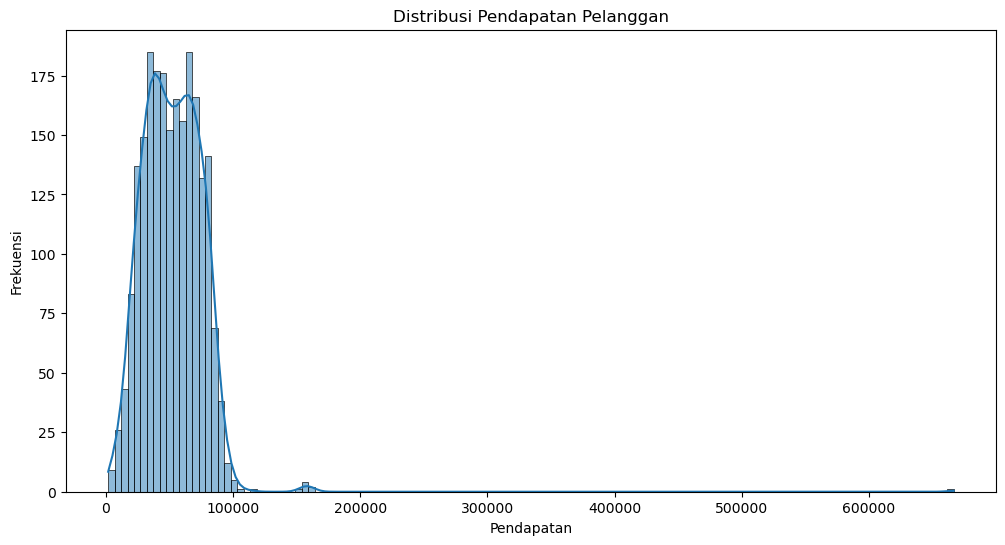

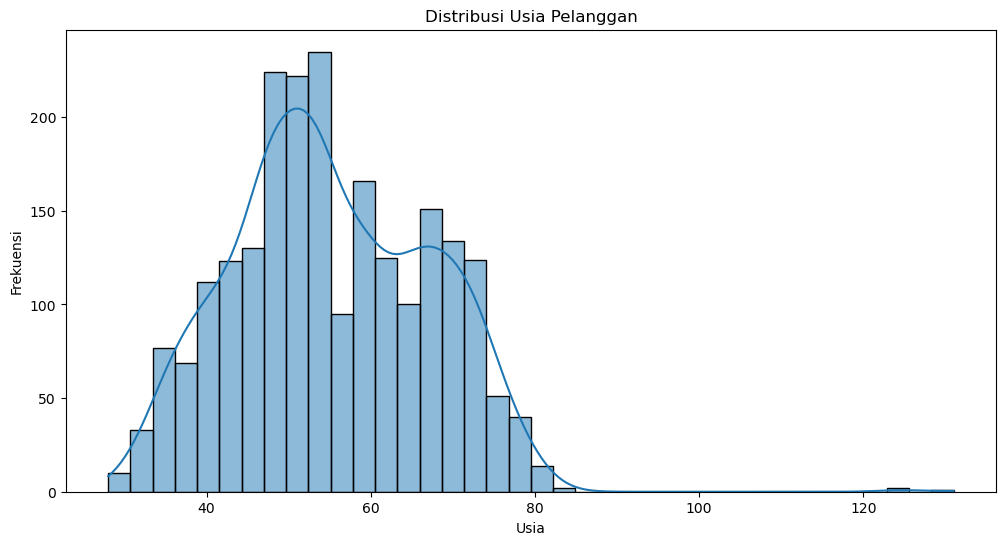

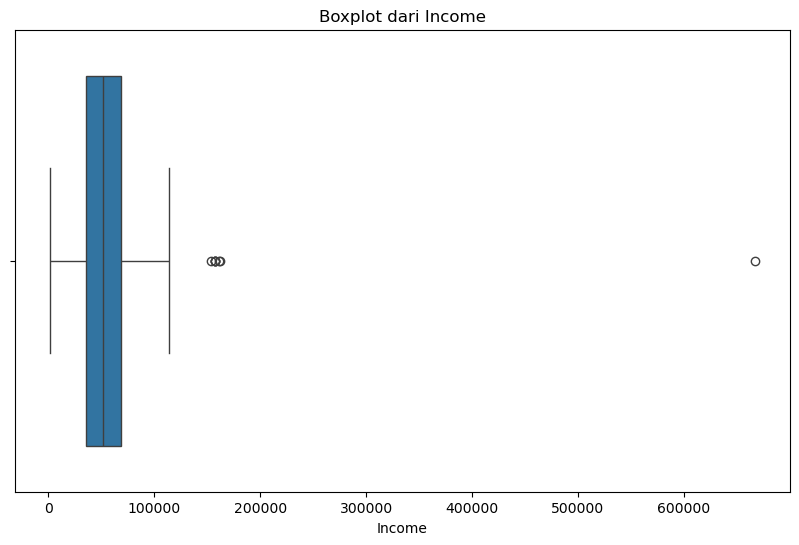

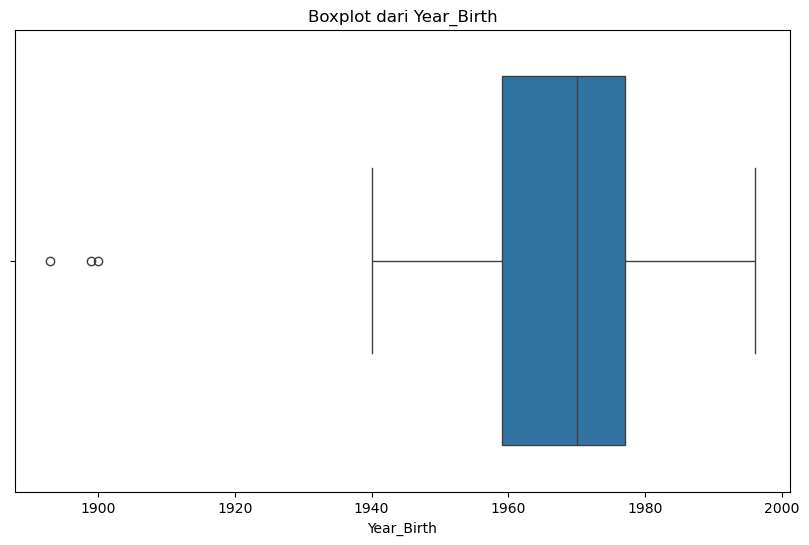

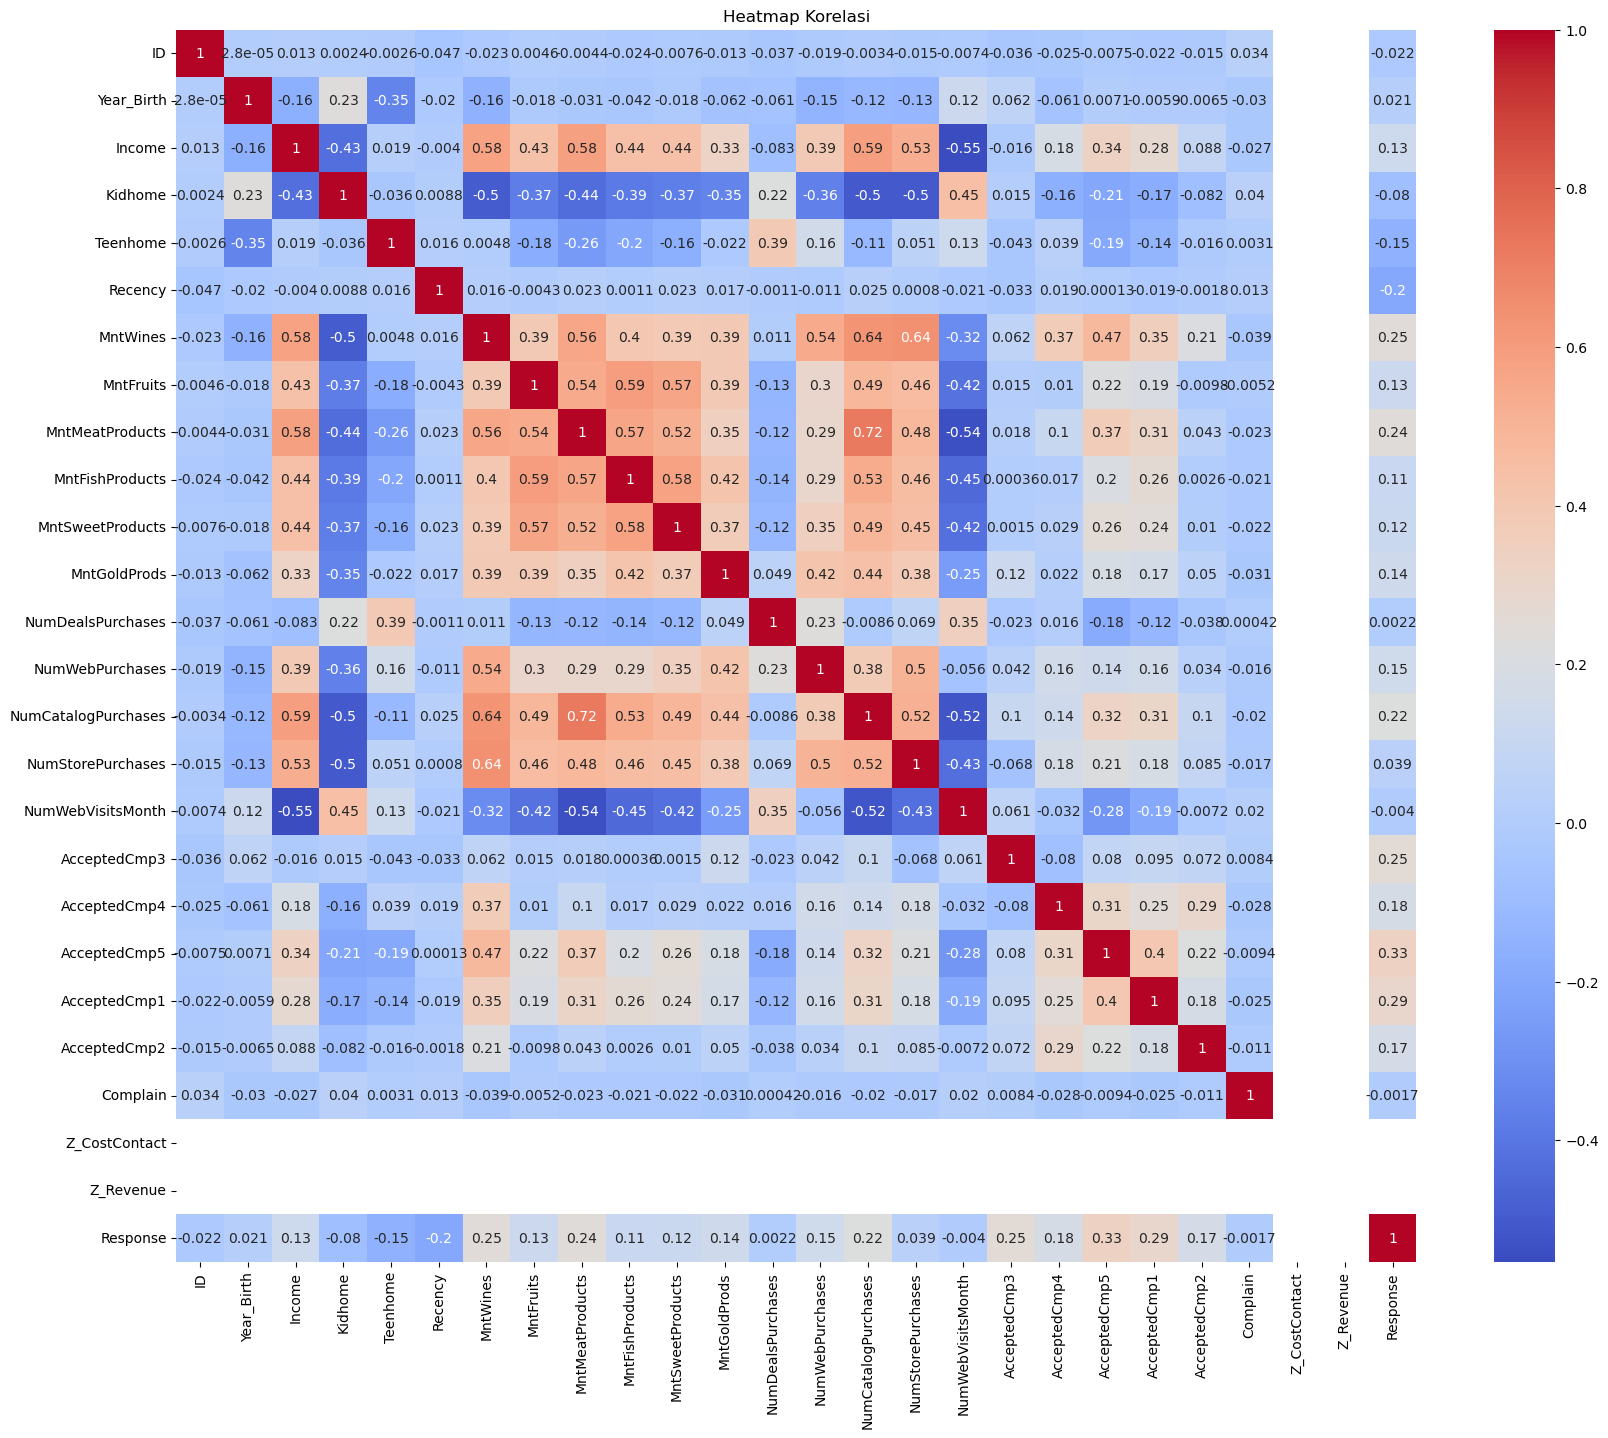


Rentang tanggal Dt_Customer:
2012-07-30 00:00:00 2014-06-29 00:00:00


In [3]:
# Memeriksa duplikat
print("Jumlah baris duplikat:", df.duplicated().sum())

# Memeriksa nilai unik untuk variabel kategorikal
print("\nNilai unik dalam Education:")
print(df['Education'].unique())
print("\nNilai unik dalam Marital_Status:")
print(df['Marital_Status'].unique())

# Statistik ringkasan untuk variabel numerik utama
print("\nStatistik ringkasan untuk Year_Birth:")
print(df['Year_Birth'].describe())
print("\nStatistik ringkasan untuk Income:")
print(df['Income'].describe())

# Memeriksa tipe data
print("\nTipe data dari semua kolom:")
print(df.dtypes)

# Visualisasi distribusi variabel kunci
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'].dropna(), kde=True)
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(2024 - df['Year_Birth'], kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Memeriksa outlier
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot dari {column}')
    plt.xlabel(column)
    plt.show()

plot_boxplot(df, 'Income')
plot_boxplot(df, 'Year_Birth')

# Memeriksa korelasi (hanya untuk kolom numerik)
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# Memeriksa konsistensi tanggal
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', dayfirst=True)
print("\nRentang tanggal Dt_Customer:")
print(df['Dt_Customer'].min(), df['Dt_Customer'].max())

### 1.3 Interpretasi Hasil Pemeriksaan Data

Berdasarkan visualisasi dan analisis yang telah dilakukan, berikut adalah interpretasi hasil pemeriksaan data:

1. **Distribusi Pendapatan**:
   - Distribusi pendapatan menunjukkan skew ke kanan yang signifikan.
   - Mayoritas pelanggan memiliki pendapatan antara 0 hingga 100,000, dengan puncak sekitar 50,000-60,000.
   - Terdapat beberapa outlier dengan pendapatan sangat tinggi, melebihi 600,000.

2. **Distribusi Usia**:
   - Distribusi usia relatif normal, dengan mayoritas pelanggan berusia antara 40 hingga 70 tahun.
   - Puncak distribusi berada di sekitar usia 50-55 tahun.
   - Terdapat beberapa outlier di kedua ujung distribusi, menunjukkan adanya pelanggan yang sangat muda dan sangat tua.

3. **Outlier Pendapatan**:
   - Boxplot pendapatan mengkonfirmasi adanya banyak outlier di rentang pendapatan tinggi.
   - Sebagian besar pendapatan terkonsentrasi dalam rentang tertentu, tetapi outlier pendapatan tinggi cukup signifikan.

4. **Outlier Tahun Kelahiran**:
   - Boxplot tahun kelahiran menunjukkan lebih sedikit outlier dibandingkan dengan pendapatan.
   - Mayoritas tahun kelahiran terkonsentrasi antara tahun 1960 dan 1980.

5. **Korelasi Antar Variabel**:
   - Terdapat korelasi positif yang kuat antara pendapatan dan berbagai kategori pengeluaran (MntWines, MntMeatProducts, dll.).
   - Korelasi negatif moderat antara tahun kelahiran dan kategori pengeluaran, menunjukkan pelanggan yang lebih muda cenderung berbelanja lebih banyak.
   - Korelasi positif di antara berbagai kategori pengeluaran.

6. **Rentang Data Pelanggan**:
   - Data pelanggan mencakup periode dari 30 Juli 2012 hingga 29 Juni 2014, kurang lebih dua tahun.

### 1.4 Kesimpulan Eksplorasi Data Awal

Berdasarkan temuan di atas, kita dapat menyimpulkan bahwa:

1. Basis pelanggan memiliki rentang pendapatan yang luas, dengan sejumlah signifikan outlier pendapatan tinggi.
2. Distribusi usia berpusat pada pelanggan paruh baya hingga lansia, yang dapat mempengaruhi strategi pemasaran.
3. Terdapat hubungan yang jelas antara pendapatan, usia, dan pola pengeluaran yang perlu diselidiki lebih lanjut.
4. Dataset mencakup periode dua tahun tertentu, yang harus dipertimbangkan saat menarik kesimpulan tentang tren jangka panjang.

### 1.5 Langkah Selanjutnya dalam Persiapan Data

Untuk mempersiapkan data lebih lanjut dan menjawab pertanyaan-pertanyaan yang diajukan dalam Latar Belakang, langkah-langkah berikut perlu dilakukan:

1. Menangani outlier pada variabel pendapatan dan usia untuk memastikan analisis yang akurat.
2. Standardisasi atau pengelompokan ulang kategori dalam variabel 'Marital_Status' dan 'Education'.
3. Membuat variabel turunan yang mungkin berguna untuk analisis, seperti 'TotalSpent' atau 'CustomerLifetime'.
4. Melakukan analisis lebih lanjut tentang hubungan antara variabel demografis dan perilaku pembelian.
5. Mempersiapkan dataset untuk analisis lanjutan seperti segmentasi pelanggan dan analisis respons kampanye.